# Live


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os

# A4 measure

In [3]:
# 
jkbond = cv2.imread("C:/Users/shrin/Pictures/Camera Roll/WIN_20191210_17_07_37_Pro.jpg")

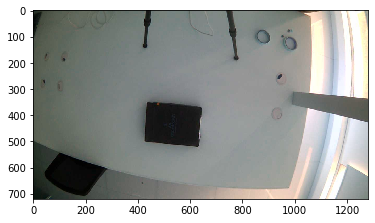

In [4]:
plt.imshow(jkbond)

In [5]:
jkbond = cv2.resize(jkbond,None,fx=2,fy=2,interpolation = cv2.INTER_CUBIC)

In [6]:
#%matplotlib notebook

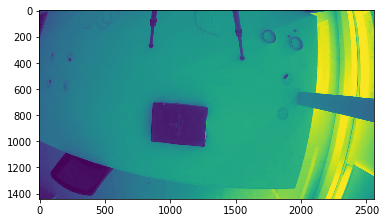

In [7]:
gray = cv2.cvtColor(jkbond,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [8]:
# x,y
tl = [520,609]
tr = [633,600]
bl = [520,640]
br = [633,640]

In [9]:
# x,y WIN_20191210_17_07_37_Pro.jpg
tl = [442,359]
tr = [650,374]
bl = [437,505]
br = [642,525]

In [10]:
_,thresh = cv2.threshold(gray,30,255,cv2.THRESH_BINARY)

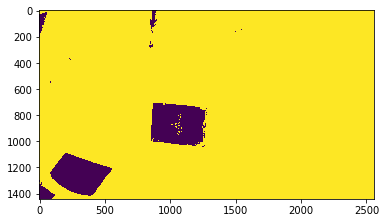

In [11]:
plt.imshow(thresh)

In [12]:
_,undistortedThreh = cv2.threshold(gray,90,250,cv2.THRESH_BINARY)
gauss = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,501,25)

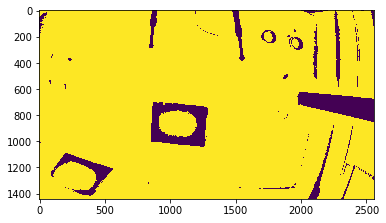

In [13]:
plt.imshow(gauss)

In [14]:
_ , contours, hierarchy =   cv2.findContours(gauss.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key = cv2.contourArea,reverse= True)

In [15]:
blank = np.zeros((gauss.shape))

blank = cv2.drawContours(blank,cnts,1,255,5)

In [16]:
#%matplotlib notebook

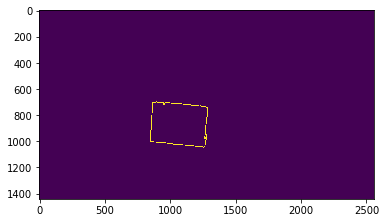

In [17]:
plt.imshow(blank)

In [18]:
blank = np.array(blank,dtype = np.uint8)

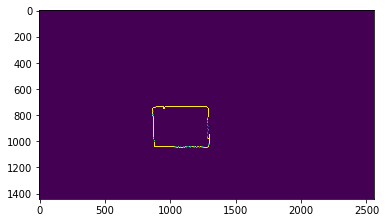

In [19]:
rect = cv2.minAreaRect(cnts[1])
angle = rect[2]

if angle < -45:
    angle = (90 + angle)

# otherwise, just take the inverse of the angle to make
# it positive
else:
    angle = -angle  

# rotate the image to deskew it
(h, w) = blank.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(blank, M, (w, h),
    flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
rotated = np.array(rotated,dtype = np.uint8)
plt.imshow(rotated)

In [20]:
_ , contours, hierarchy =   cv2.findContours(rotated.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key = cv2.contourArea,reverse= True)
print(len(cnts))

1


In [21]:
x,y,w,h = cv2.boundingRect(cnts[-1])

In [22]:
lenght = (x+w)-x +10
print("lenght in pixel-------->", lenght)
width = ((y+h)-y) +10
print("width in pixel--------->", width)

lenght in pixel--------> 457
width in pixel---------> 332


In [23]:
#lenght = tr[1] - tl[1]
#width = br[0] - bl[0]

# Real_obj_dst = (dst * objct_height_in_PIX * sensor_height_MM) / ( FL_in_MM * img_height_PIX)

In [24]:
dst = 117 *10

In [25]:
Real_obj_lenght = ( dst * (lenght) * 3.6) / (3.2 * blank.shape[1])

In [26]:
Real_obj_lenght

234.97119140625

In [27]:
Real_obj_width = ( dst * (width) * 3.6) / (3.2 * blank.shape[1])

In [28]:
Real_obj_width

170.701171875

In [29]:
print("error in length --->", (Real_obj_lenght - 300)/10, "CM")

error in length ---> -6.502880859375 CM


In [30]:
print("error in width --->", (Real_obj_width - 220)/10,"CM")

error in width ---> -4.9298828125 CM


In [31]:
124-7

117